In [1]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2


from azure.quantum import Workspace
from azure.quantum.qiskit import AzureQuantumProvider

import sys
import os

sys.path.append(os.path.abspath("..\\..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


Stabilizers:

$$ XZZXI $$
$$ IXZZX $$
$$ XIXZZ $$
$$ ZXIXZ $$
$$ (ZZXIX) $$


In [26]:
stabilizers = ['XZZXI', 'IXZZX', 'XIXZZ', 'ZXIXZ', 'ZZXIX']
operators = stabilizers + ['X']

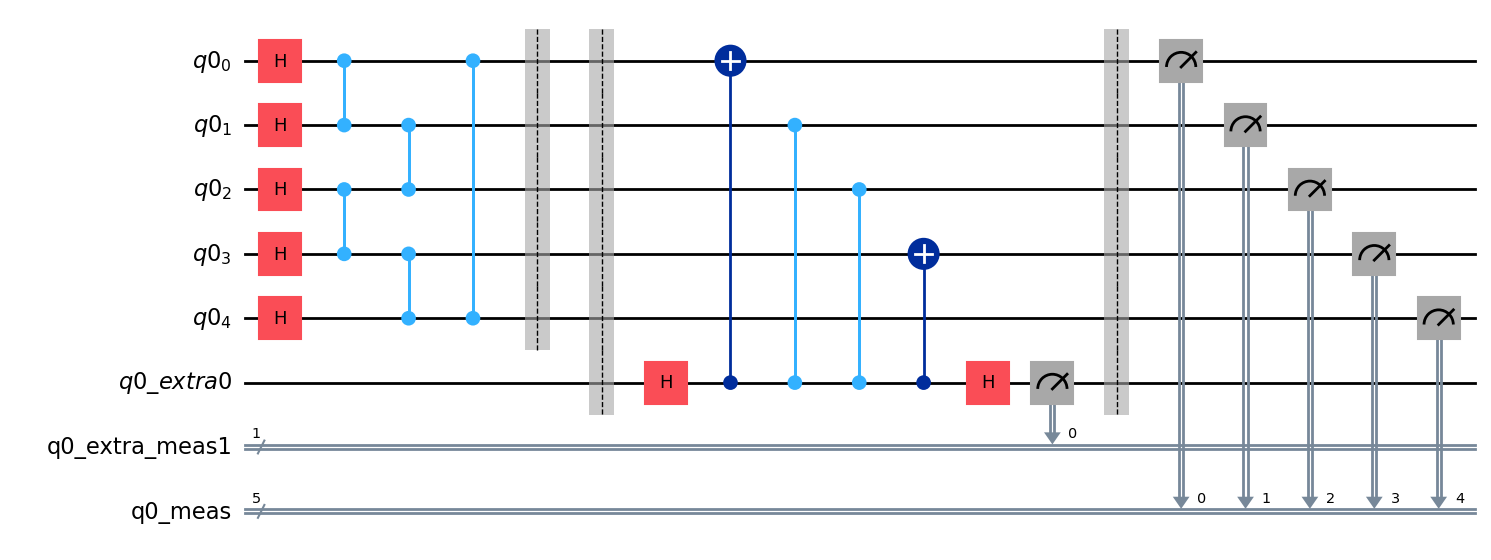

In [12]:

def load_circuit(operator):

    qc = FiveQbStabilizerCodeCircuit(1)

    qc.encode(type='-')
    
    qc.measure_operator(operator=operator)
    
    qc.barrier()
    
    qc.measure_all()

    return qc

qc = load_circuit(stabilizers[0])
qc.draw('mpl')



In [6]:
# IonQ access
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

In [7]:
backend_name = "ionq.qpu.aria-1"
backend_name_simulator = "ionq.simulator"
backend = provider.get_backend(backend_name)
simulator_backend = provider.get_backend(backend_name_simulator)

option_params = {
    "error-mitigation": {
        "debias": False,
        "sharpen": False
    }
}

backend.options.update_options(**option_params)
simulator_backend.options.update_options(**option_params)
simulator_backend.options.update_options(noise_model="aria-1") 

In [23]:
qc = load_circuit(stabilizers[0])
qc = load_circuit(stabilizers[1])
qc = load_circuit(stabilizers[2])
qc = load_circuit(stabilizers[3])
qc = load_circuit(stabilizers[4])
qc = load_circuit('X')

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, optimization_level=3)
print(f"Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 13


In [21]:
# simulation_result = sampler_simulation(qc.physical_circuit, 3200)

# extract_simulation_results([simulation_result], type='percentage')


Run experiment

In [ ]:
shots = 3200
# job = backend.run(isa_circuit, shots=shots)
# job = simulator_backend.run(circuits, shots=shots) # simulador
# job_id = job.id()

job = workspace.get_job('')


Job id e1f02a93-f2f1-11ef-b554-3800255d459d


In [ ]:
job = workspace.get_job('9349ea03-f881-11ef-bbd9-3800255d459d')
print(job.details.status)
print(job.details.output_data_uri)

In [ ]:

results = extract_results_json_IONQ('5qb_stabilizer_minus_X.json', type='percentage', reverse_order=True)[0]
print(results)

In [ ]:
states = get_possible_states(5)
valid_states = states

In [ ]:
plot_results_hamming_distance(results, 5, valid_states)

TVD

In [ ]:
tvd = calculate_tvd(results, generate_uniform_distribution(5, valid_states), percentage=True)

print(f"Total Variation Distance: {round(tvd*100,2)}%")